In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

        
import warnings
warnings.filterwarnings('ignore')

In [107]:
data = pd.read_csv('Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### column description
- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [109]:
data.shape

(2200, 8)

In [110]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [111]:
# check wheter there is null value or not
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

- there is no null value in our data 

In [112]:
# check duplicated or not 
data.duplicated().sum()

# there is no duplicated rows in data

0

#### let's see how is our output column is

In [113]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

- the dataset is well balanced it contain each categories 100 data rows

## EDA

In [114]:
data.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
517,0,55,25,28.174894,43.667230,4.524172,45.781728,mothbeans
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
1731,34,68,51,27.347349,94.177567,6.687088,40.351531,papaya
253,29,77,75,17.503611,15.480832,7.778592,72.944667,chickpea
1382,101,11,51,25.507370,84.243402,6.792036,44.206900,watermelon


1) Nitrogen Analysis

In [115]:
# checking the Nitrogen
df = data[['N' ,'label']].groupby('label').sum().sort_values(by='N' ,ascending=False)


fig1= px.histogram(x=df.index , y=df['N'].values , color=df.index ,log_y=True ,
             text_auto=True ,title='Nitrogen analysis in different crops')

fig1.update_layout(
    xaxis_title = 'crops',
    yaxis_title = 'amount of Nitrogen required for plant'
)
fig1.show()

2) Phosphorous  analysis

In [116]:
df = data[['P' ,'label']].groupby('label').sum().sort_values(by='P' ,ascending=False)


fig2 = px.histogram(x=df.index , y=df['P'].values , color=df.index ,log_y=True ,
             text_auto=True ,title='Phosphorous analysis in different crops')

fig2.update_layout(
    xaxis_title = 'crops',
    yaxis_title = 'amount of Phosphorous required for plant'
)
fig2.show()

3) Potassium analysis

In [117]:
df = data[['K' ,'label']].groupby('label').sum().sort_values(by='K' ,ascending=False)
fig = px.histogram(x=df.index , y=df['K'].values , color=df.index ,log_y=True ,
             text_auto=True,title='Potassium analysis in different crops')
fig.update_layout(
    xaxis_title = 'crops',
    yaxis_title = 'amount of potassium required for plant'
)
fig.show()

<Axes: >

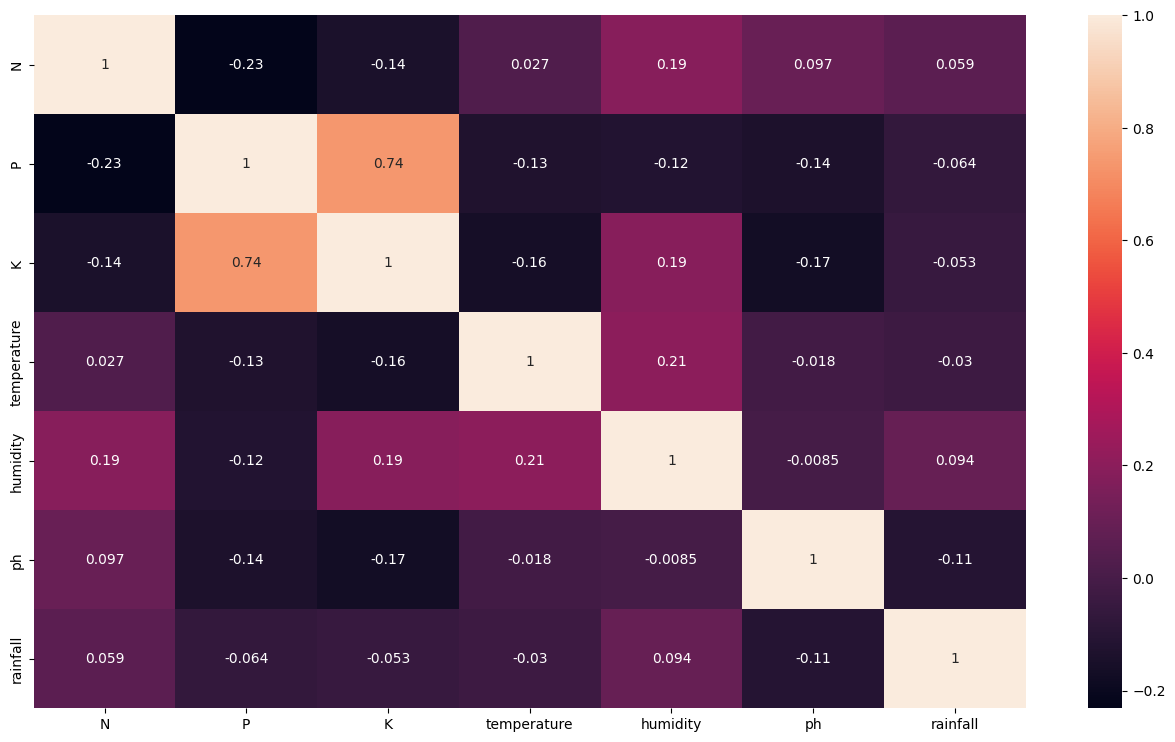

In [118]:
# lets plot the correlation plot
df1 = data[['N','P','K','temperature','humidity','ph','rainfall']]
plt.figure(figsize=(16,9))
sns.heatmap(data=df1.corr() , annot=True)

In [119]:
df2 = data[['P' ,'K' , 'N' , 'label']]
df2

,P,K,N,label
0,42,43,90,rice
1,58,41,85,rice
2,55,44,60,rice
3,35,40,74,rice
4,42,42,78,rice
...,...,...,...,...
2195,34,32,107,coffee
2196,15,27,99,coffee
2197,33,30,118,coffee
2198,32,34,117,coffee


In [120]:
# u can see the potassium and phosporous have best relation
px.histogram( x=df2['P'] ,y=df2['label'], color=df2['label']  ,
             text_auto=True,title='Potassium analysis in different crops')

In [121]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df2['label'],
    y=df2['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=df2['label'],
    y=df2['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=df2['label'],
    y=df2['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [122]:
df2

,P,K,N,label
0,42,43,90,rice
1,58,41,85,rice
2,55,44,60,rice
3,35,40,74,rice
4,42,42,78,rice
...,...,...,...,...
2195,34,32,107,coffee
2196,15,27,99,coffee
2197,33,30,118,coffee
2198,32,34,117,coffee


In [123]:
df3 = df2.groupby('label').sum('P')
fruit = df3[~df3.index.isin(['rice' , 'jute' , 'maize' , 'cotton','lentil'])]

# crops --->>> ['rice' , 'jute' , 'maize' , 'cotton','lentil']

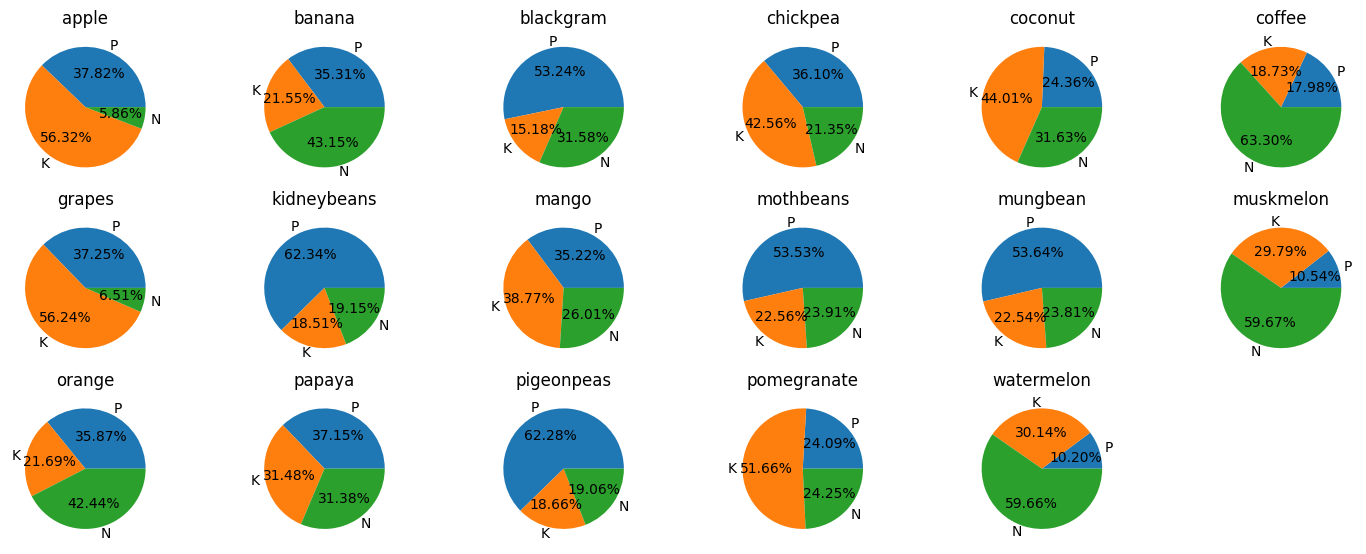

In [124]:
# ploting all the fruit data only  
plt.figure(figsize=(18,9))

df3 = df2.groupby('label').sum('P')
fruit = df3[~df3.index.isin(['rice' , 'jute' , 'maize' , 'cotton','lentil'])]

for i in range(fruit.shape[0]):
    plt.subplot(4,6,i+1)
    plt.pie(fruit.iloc[i,:] ,autopct='%.2f%%' ,labels=fruit.columns )
    plt.title(fruit.index[i])
    plt.axis(False)
plt.show()
    

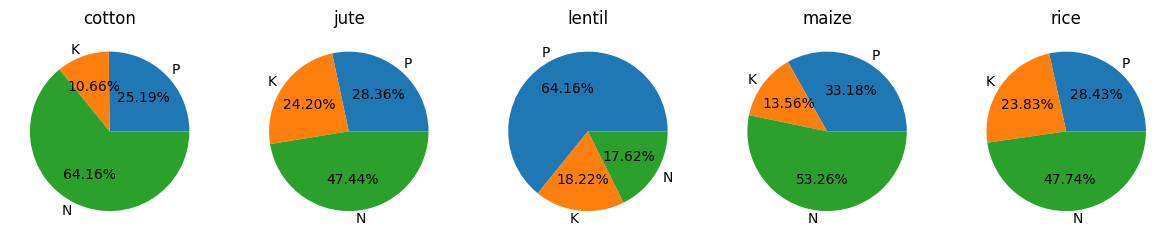

In [125]:
# plotting the crops
plt.figure(figsize=(18 , 12))
df3 = df2.groupby('label').sum('P')

crops = df3[df3.index.isin(['rice' , 'jute' , 'maize' , 'cotton','lentil'])]
for i in range(crops.shape[0]):
    plt.subplot(4,6,i+1)
    plt.pie(crops.iloc[i,:] ,autopct='%.2f%%' ,labels=crops.columns )
    plt.title(crops.index[i])
    plt.axis(False)
plt.show()


### plotting the crops against humidity and tempreture

In [126]:
crop_df = data[data['label'].isin(['rice' , 'jute' , 'maize' , 'cotton','lentil'])]
crop_df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2095,87,44,43,23.874845,86.792613,6.718725,177.514731,jute
2096,88,52,39,23.928879,88.071123,6.880205,154.660874,jute
2097,90,39,37,24.814412,81.686889,6.861069,190.788639,jute
2098,90,39,43,24.447439,82.286484,6.769346,190.968489,jute


In [127]:
fig = px.scatter(crop_df , x = crop_df['temperature'] , y = crop_df['humidity'] , color=crop_df['label'] , symbol=crop_df['label'])
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()  

In [128]:
crop_summary = pd.pivot_table(data,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [129]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

https://www.kaggle.com/code/ysthehurricane/crop-recommendation-system-using-lightgbm

In [130]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


- preprare the data

In [131]:
# separate the input and output data
x = data.drop('label' , axis=1)
y = data['label']


In [132]:
y.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [133]:
y = data['label'].map({ 'rice':1, 
        'maize'       : 2, 
        'chickpea'    : 3  ,
        'kidneybeans' : 4  ,
        'pigeonpeas'  : 5  ,
        'mothbeans'   : 6  , 
        'mungbean'    : 7   , 
        'blackgram'   : 8  , 
        'lentil'      : 9  ,
        'pomegranate' : 10    ,
        'banana'      : 11   , 
        'mango'       : 12   , 
        'grapes'      : 13   , 
        'watermelon'  : 14   , 
        'muskmelon'   : 15   , 
        'apple'       : 16   ,
        'orange'      : 17   , 
        'papaya'      : 18   , 
        'coconut'     : 19   ,
        'cotton'      : 20   , 
        'jute'        : 21   , 
        'coffee'      : 22   })

In [134]:
y.sample(5)

1031    11
1507    16
1167    12
2107    22
941     10
Name: label, dtype: int64

In [135]:
x.sample(5)

,N,P,K,temperature,humidity,ph,rainfall
1865,15,28,32,28.842710,99.643285,6.218572,224.401668
656,2,38,18,27.536329,89.929082,6.619891,45.485919
1357,120,20,45,25.665760,88.698423,6.114129,54.227225
84,67,58,39,25.282722,80.543728,5.453592,220.115671
2023,80,45,42,23.142650,74.997398,7.380396,151.903548


In [136]:
y.sample(5)

2069    21
1960    20
289      3
504      6
237      3
Name: label, dtype: int64

- split the data into training and testing

In [137]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,shuffle=True ,  random_state=42)

In [138]:
print(f"input data for model training is {x_train.shape}")
print(f"input labels for model training is {y_train.shape}")
print(f"output data for model training is {x_test.shape}")
print(f"output labels for model training is {y_test.shape}")


input data for model training is (1760, 7)
input labels for model training is (1760,)
output data for model training is (440, 7)
output labels for model training is (440,)


- creating the model 

In [139]:
'''# let's tryout the Decision Tree
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier()
tree.fit(x_train , y_train)'''

"# let's tryout the Decision Tree\nfrom sklearn.tree import DecisionTreeClassifier \ntree = DecisionTreeClassifier()\ntree.fit(x_train , y_train)"

In [140]:
'''y_pred = tree.predict(x_test)'''

'y_pred = tree.predict(x_test)'

In [141]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(x_train , y_train)

RandomForestClassifier(n_estimators=150)

In [142]:
y_pred = tree.predict(x_test)

- check the accuracy of model

In [143]:
from sklearn.metrics import accuracy_score , confusion_matrix
print(f"the accuracy of Decision Tree Classifier is {round(accuracy_score(y_pred , y_test),2)}")

the accuracy of Decision Tree Classifier is 0.98


- confusion matrix for our model

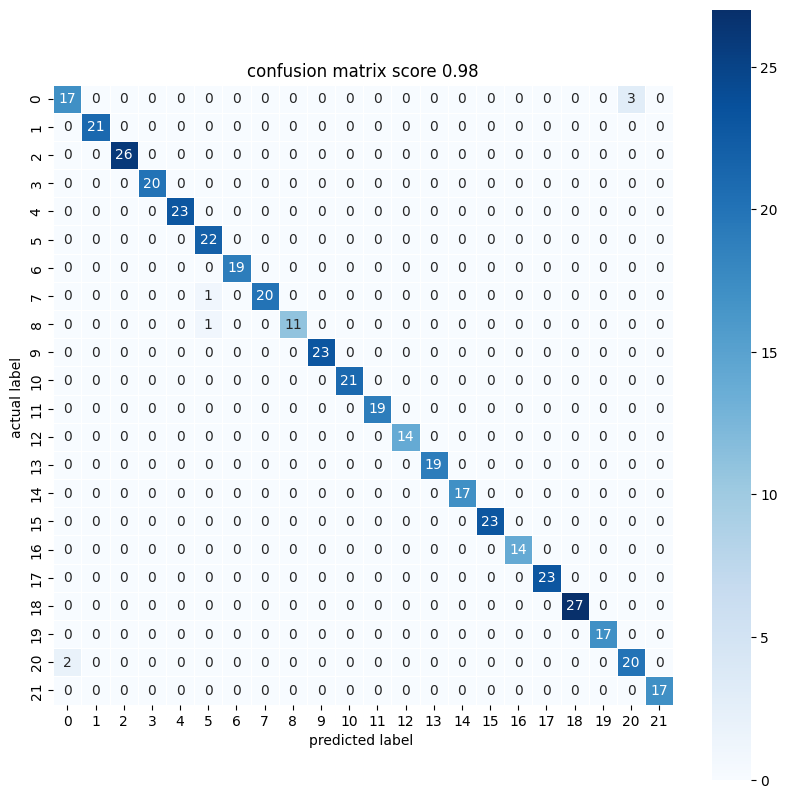

In [144]:
cm = confusion_matrix(y_pred ,y_test)
plt.figure(figsize=(10,10))
plt.title(f'confusion matrix score {round(accuracy_score(y_pred , y_test),2)}')
sns.heatmap(cm ,annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.xlabel('predicted label ')
plt.ylabel('actual label ')
plt.show()

- lets see whether model overfit or not

In [145]:

print(f"the training accuracy of model {tree.score(x_train , y_train)}")
print(f"the testing  accuracy of model {round(tree.score(x_test ,y_test),2)}")

the training accuracy of model 1.0
the testing  accuracy of model 0.98


- by seeing the training and testing accuracy of model. there is no overfitting

- now we make the prediction function

In [146]:
class_name = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']



In [147]:
def make_prediction(input_data ,model ,  class_name = class_name):
    pred = model.predict([input_data])
    op = class_name[pred[0]-1]
    return "the predicted crop is " +op
    
make_prediction([45,50,40,46.879744,90,9.502985,120.491012] , model=tree)

'the predicted crop is papaya'

- save the model

In [148]:
import pickle

In [149]:
pickle.dump(tree ,open('app.sav' ,'wb'))

In [150]:
load_model = pickle.load(open('app.sav','rb'))

In [151]:


def make_prediction(input_data ,model ,  class_name = class_name):

    pred = model.predict([input_data])
    op = class_name[pred[0]-1]
    return "the predicted crop is " +op
    
make_prediction([45,50,40,46.879744,90,9.502985,120.491012] , model=load_model)

'the predicted crop is papaya'

In [101]:
data.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
1524,29,144,204,22.433245,92.486677,5.800449,119.102519,apple
1655,4,6,7,23.010143,91.117642,6.708890,112.673830,orange
1227,5,126,197,12.800004,81.208764,6.417501,67.104394,grapes
1903,133,47,23,24.887381,75.621372,6.827355,89.760504,cotton
2156,108,35,25,23.981433,61.109351,6.971963,161.527909,coffee


In [54]:
data['rainfall'].min() ,data['rainfall'].max() 

(20.21126747, 298.5601175)

In [48]:
data['N']

0        90
1        85
2        60
3        74
4        78
       ... 
2195    107
2196     99
2197    118
2198    117
2199    104
Name: N, Length: 2200, dtype: int64

In [152]:
import sklearn
sklearn.__version__

'1.3.2'